# PRCP-1016-HeartDieseasePred

## Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Create a model predicting potential Heart Diseases in people using Machine Learning algorithms.

Task3:-Suggestions to the Hospital  to awake the predictions of heart diseases  prevent life threats.

## Problem description
Your goal is to predict the binary class heart_disease_present, which represents whether or not a patient has heart disease:
- 0 represents no heart disease present
- 1 represents heart disease present

# Import Basic Modules

In [19]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading CSV File

In [21]:
labels=pd.read_csv('labels.csv')
values=pd.read_csv('values.csv')

In [22]:
labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [23]:
values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


# Domain Analysis

There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.
- patient_id - Unique ID for each Patients
- slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
- thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
- resting_blood_pressure (type: int): resting blood pressure
- chest_pain_type (type: int): chest pain type (4 values)
- num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
- fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
- resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
- serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
- oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
- sex (type: binary): 0: female, 1: male
- age (type: int): age in years
- max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
- exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)

In [26]:
data = pd.merge(values, labels, on="patient_id")

In [27]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


# Getting information of dataset

In [29]:
data.shape

(180, 15)

In [30]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [31]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [33]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [34]:
data.describe(include='O') # Description of Dataset including objects.

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


# Rename Columns

In [36]:
data.rename({'patient_id':'PATIENTID', 'slope_of_peak_exercise_st_segment':'EXERCISEST', 'thal':'THAL',
       'resting_blood_pressure':'BP', 'chest_pain_type':'CHESTPAIN', 'num_major_vessels':'MAJORVESSELS',
       'fasting_blood_sugar_gt_120_mg_per_dl':'FASTINGBP', 'resting_ekg_results':'RESTINGEKG',
       'serum_cholesterol_mg_per_dl':'CHOLESTEROL', 'oldpeak_eq_st_depression':'DEPRESSION', 'sex':'SEX', 'age':'AGE',
       'max_heart_rate_achieved':'MAXHEARTRATE', 'exercise_induced_angina':'EXERCISEANGINA',
       'heart_disease_present':'HEART'},axis=1,inplace=True)

In [37]:
data.head(2)

,PATIENTID,EXERCISEST,THAL,BP,CHESTPAIN,MAJORVESSELS,FASTINGBP,RESTINGEKG,CHOLESTEROL,DEPRESSION,SEX,AGE,MAXHEARTRATE,EXERCISEANGINA,HEART
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0


In [38]:
data.head()

,PATIENTID,EXERCISEST,THAL,BP,CHESTPAIN,MAJORVESSELS,FASTINGBP,RESTINGEKG,CHOLESTEROL,DEPRESSION,SEX,AGE,MAXHEARTRATE,EXERCISEANGINA,HEART
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [39]:
data_new=data.dropna(axis=1)  #removing columns which containing nan or missing values
data_new.keys()

Index(['PATIENTID', 'EXERCISEST', 'THAL', 'BP', 'CHESTPAIN', 'MAJORVESSELS',
       'FASTINGBP', 'RESTINGEKG', 'CHOLESTEROL', 'DEPRESSION', 'SEX', 'AGE',
       'MAXHEARTRATE', 'EXERCISEANGINA', 'HEART'],
      dtype='object')

In [40]:
data_new.head()

,PATIENTID,EXERCISEST,THAL,BP,CHESTPAIN,MAJORVESSELS,FASTINGBP,RESTINGEKG,CHOLESTEROL,DEPRESSION,SEX,AGE,MAXHEARTRATE,EXERCISEANGINA,HEART
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [41]:
numaric_data=data_new.select_dtypes(include=['int64','float64'])
numaric_data

,EXERCISEST,BP,CHESTPAIN,MAJORVESSELS,FASTINGBP,RESTINGEKG,CHOLESTEROL,DEPRESSION,SEX,AGE,MAXHEARTRATE,EXERCISEANGINA,HEART
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0,0


In [42]:
cat_data=data_new.select_dtypes(exclude=['int64','float64'])
cat_data

,PATIENTID,THAL
0,0z64un,normal
1,ryoo3j,normal
2,yt1s1x,normal
3,l2xjde,reversible_defect
4,oyt4ek,reversible_defect
...,...,...
175,5qfar3,reversible_defect
176,2s2b1f,normal
177,nsd00i,reversible_defect
178,0xw93k,normal


# EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis (EDA) is an approach to data analysis that focuses on summarizing and visualizing data to understand its main characteristics, patterns, and relationships between variables. The primary goal of EDA is to gain insights and intuition about the data, which can be useful for subsequent modeling and hypothesis testing. It is typically one of the initial steps in the data analysis process.



- 1). **Univarient analysis**
- 2). **Bivarient Analysis**  and  
- 3). **Multivarient analysis**  


 - 1).**Univariate Analysis**: In univariate analysis we get the unique labels of categorical features, as well as get the range & density of numbers.  

- 2). **Bivariate Analysis**: In bivariate analysis we check the feature relationship with target veriable.

- 3). **Multivariate Analysis**: In multivariate Analysis check the relationship between two veriable with respect to the target veriable.  

- **Library Used**: Matplotlib & Seaborn


UNIVARIATE ANALYSIS

In [47]:
numaric_data

,EXERCISEST,BP,CHESTPAIN,MAJORVESSELS,FASTINGBP,RESTINGEKG,CHOLESTEROL,DEPRESSION,SEX,AGE,MAXHEARTRATE,EXERCISEANGINA,HEART
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0,0


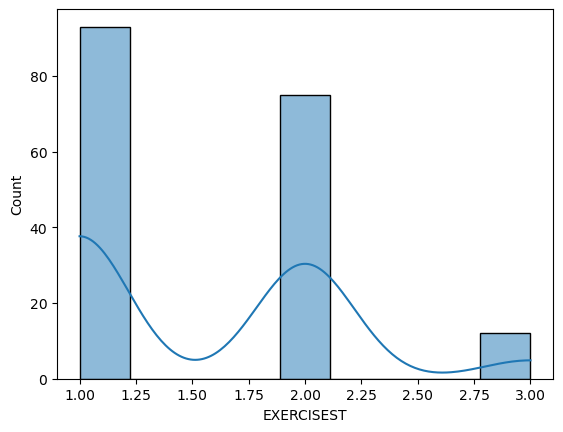

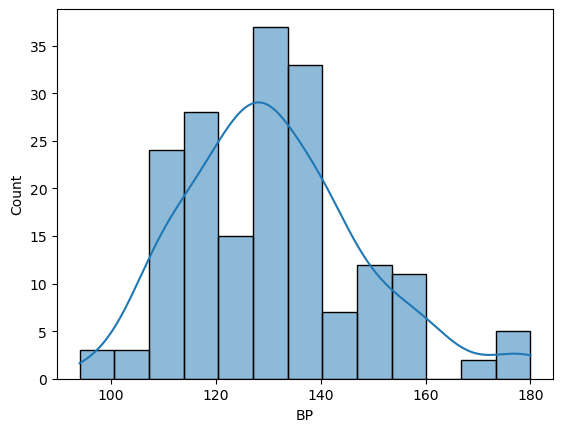

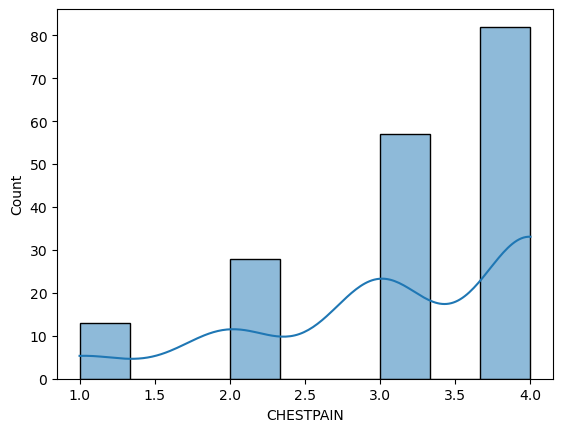

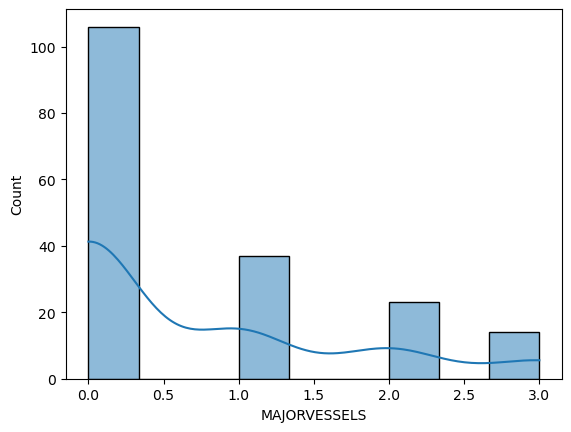

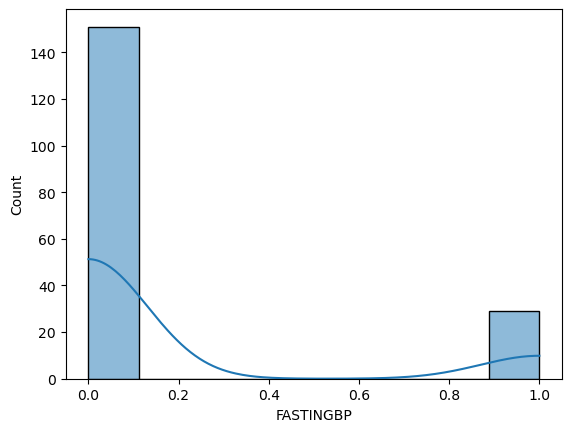

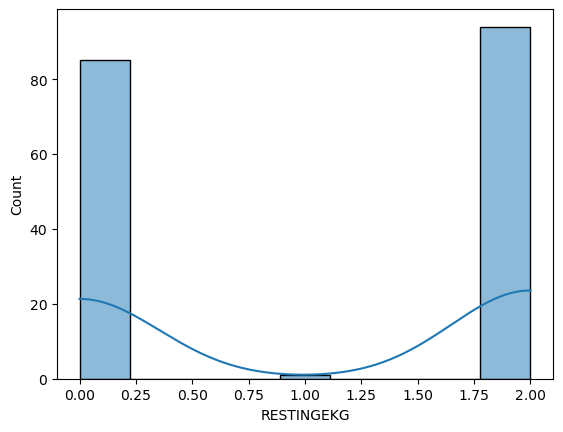

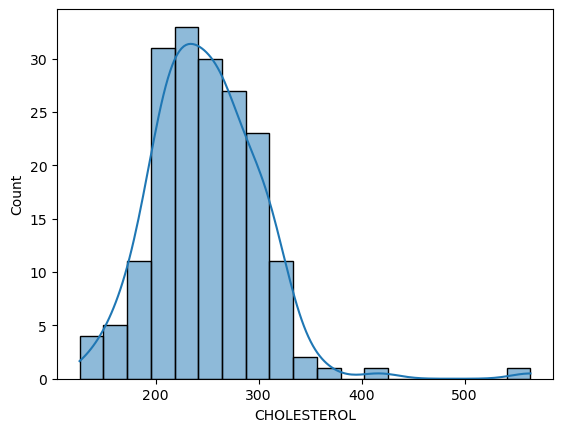

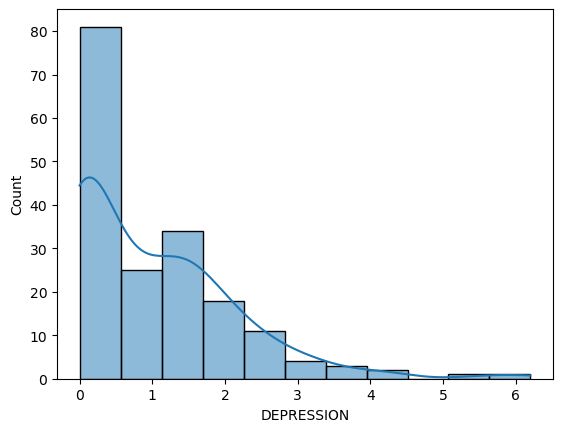

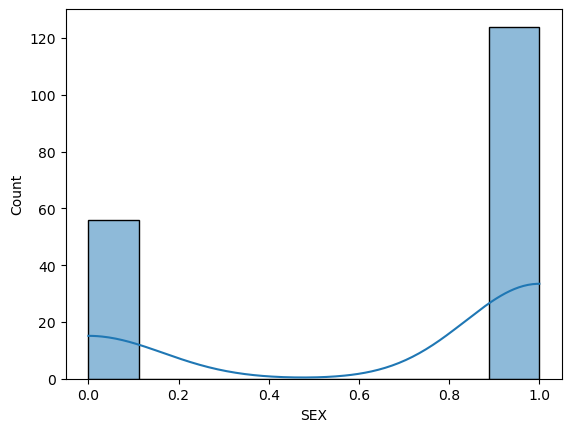

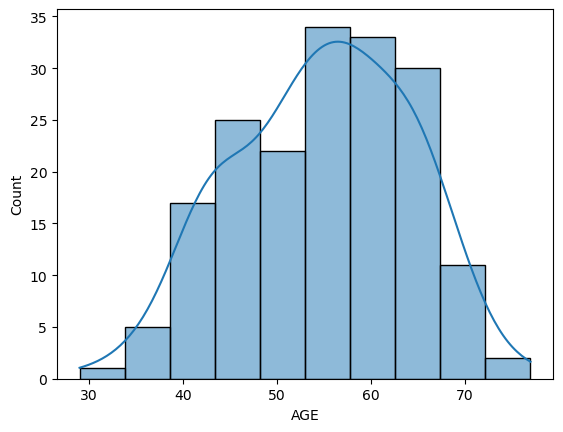

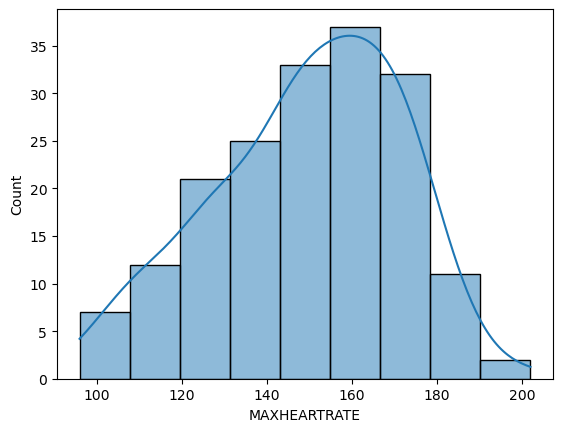

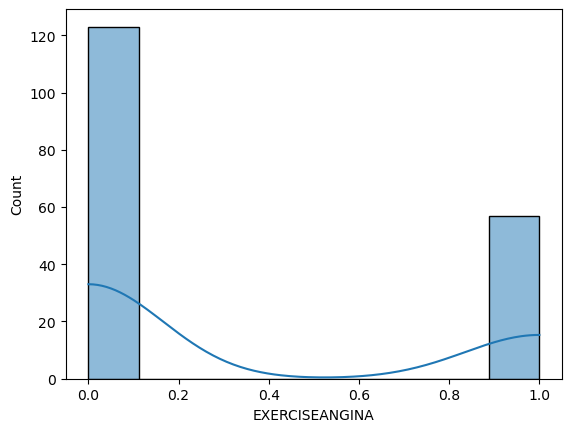

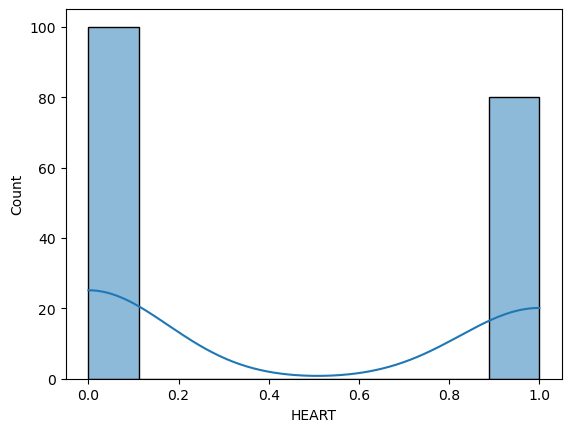

In [48]:
for columns in numaric_data:
    sns.histplot(x=columns, data=numaric_data, kde=True)
    plt.show()

1. EXERICISEST only 3 Values ,the smaller value Was High Count
2. BP is works as noraml distribution
3. CHESTPAIN was 4 points and Count is Increases Who has Pain
4. MAJORVESSELS was on;y 4 points and low value has high count
5. FASTINGBP lower then count Increases
6. RESTINGEKG both high and low values
7. CHOLESTEROL at 200 - 300 the Count is high
8. DEPRESSION high then count is low
9. SEX Male have high count 
10. AGE was 50 - 60 high count
11. MAXHEARTRATE 150-180 have high Count
12. EXERCISEANGINA 2 values
13. HEART in the data NO heartproblem is slightly high that that,

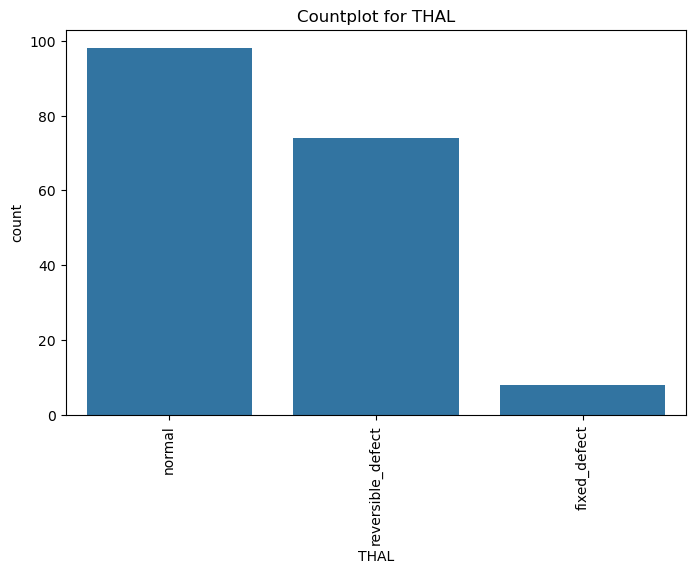

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x='THAL', data=data)
plt.title(f'Countplot for THAL')
plt.xticks(rotation=90)
plt.show()

- THAL was be noraml have high Count 

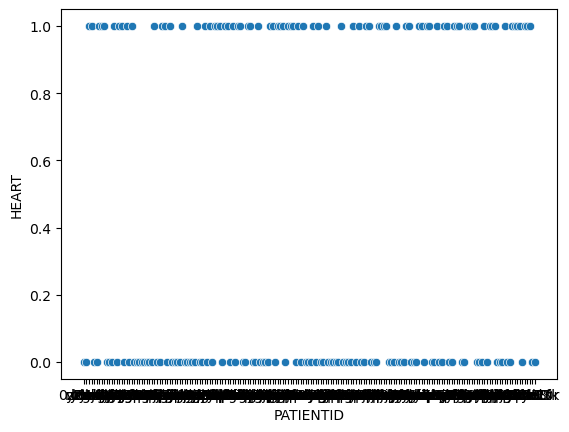

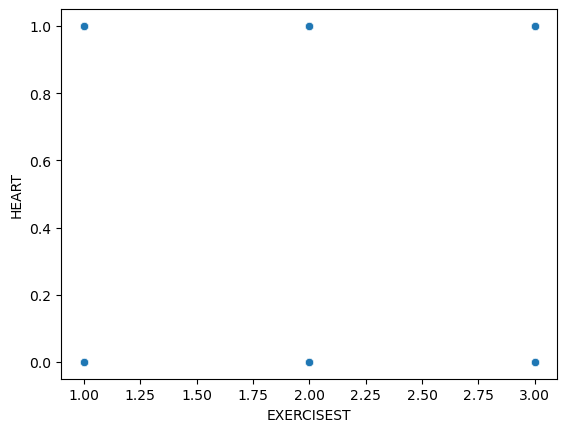

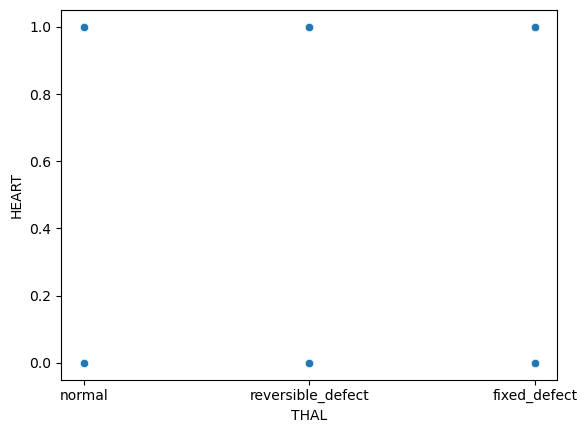

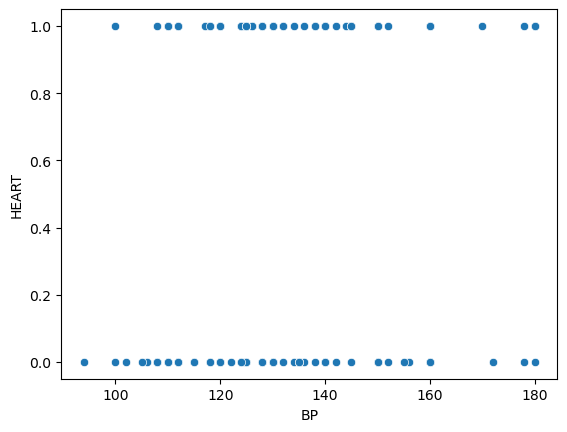

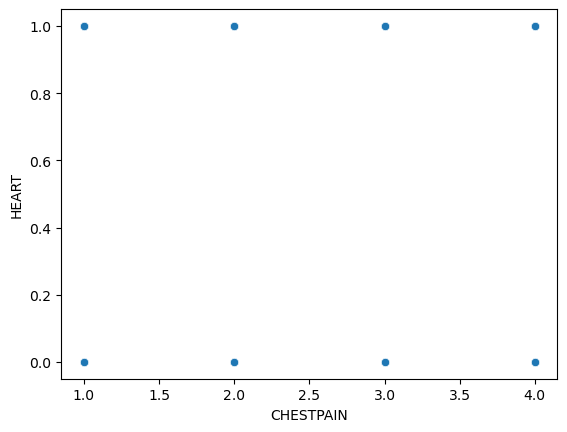

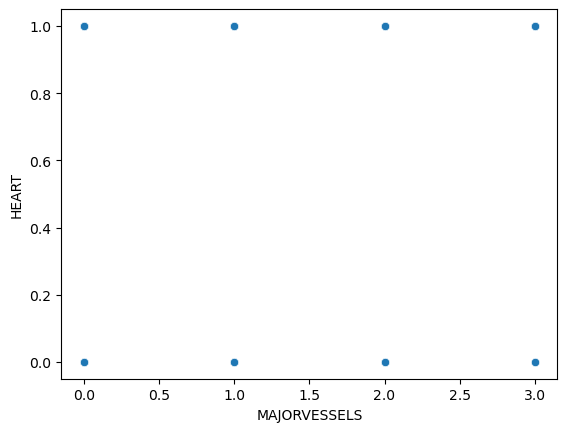

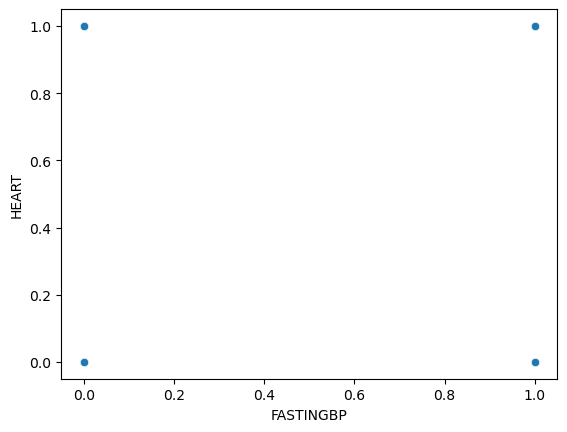

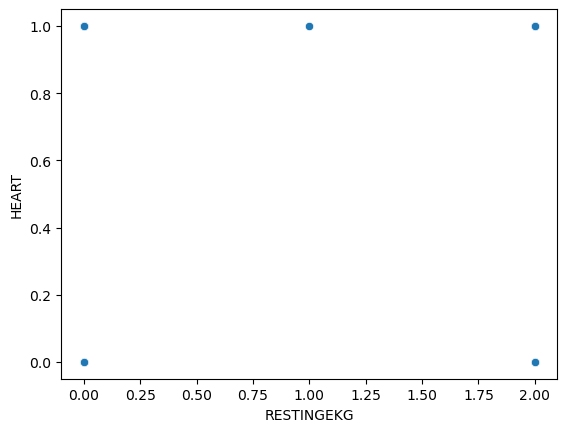

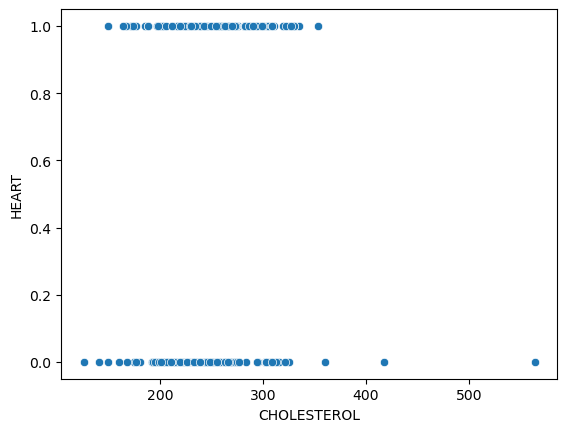

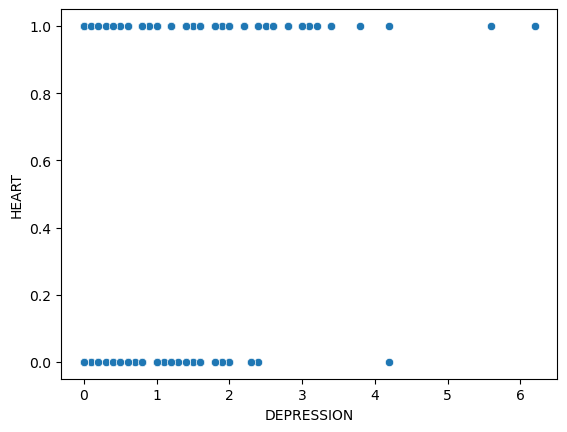

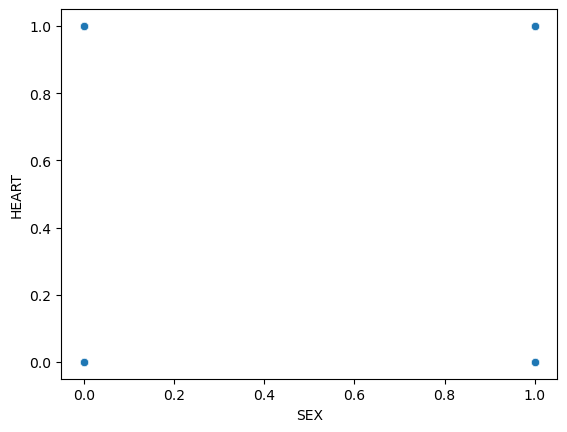

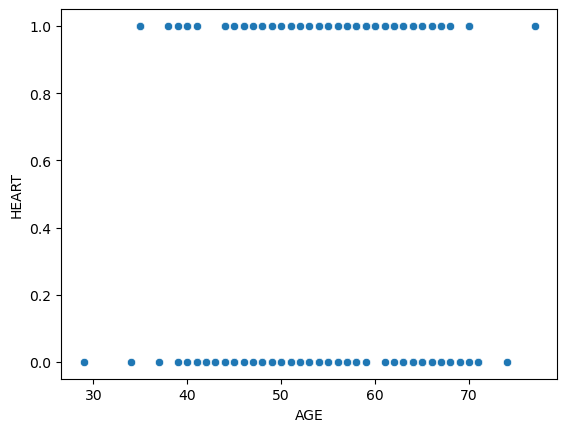

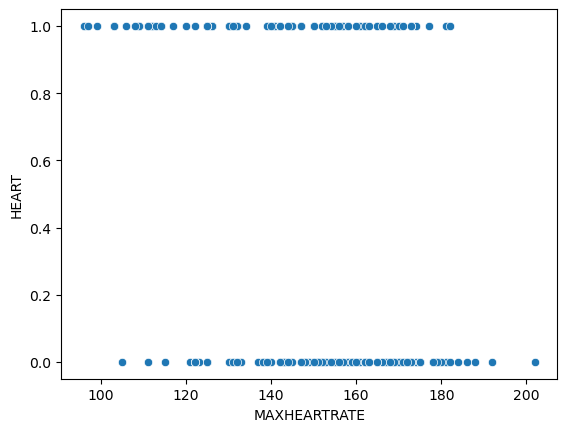

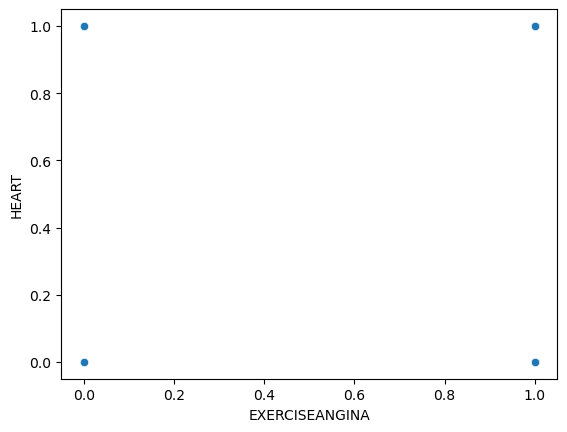

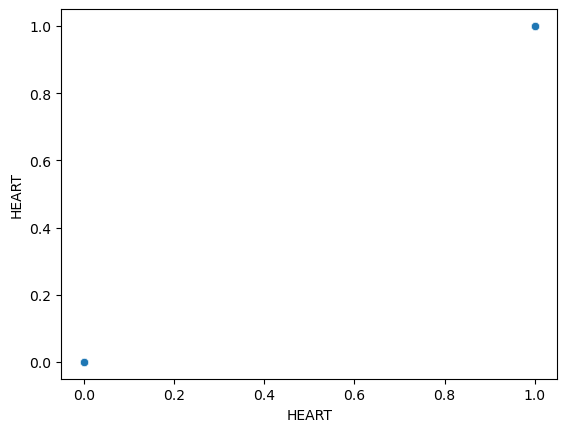

In [52]:
for columns in data_new:
    sns.scatterplot(x=columns,y=data_new.HEART,data=data_new)
    plt.show()

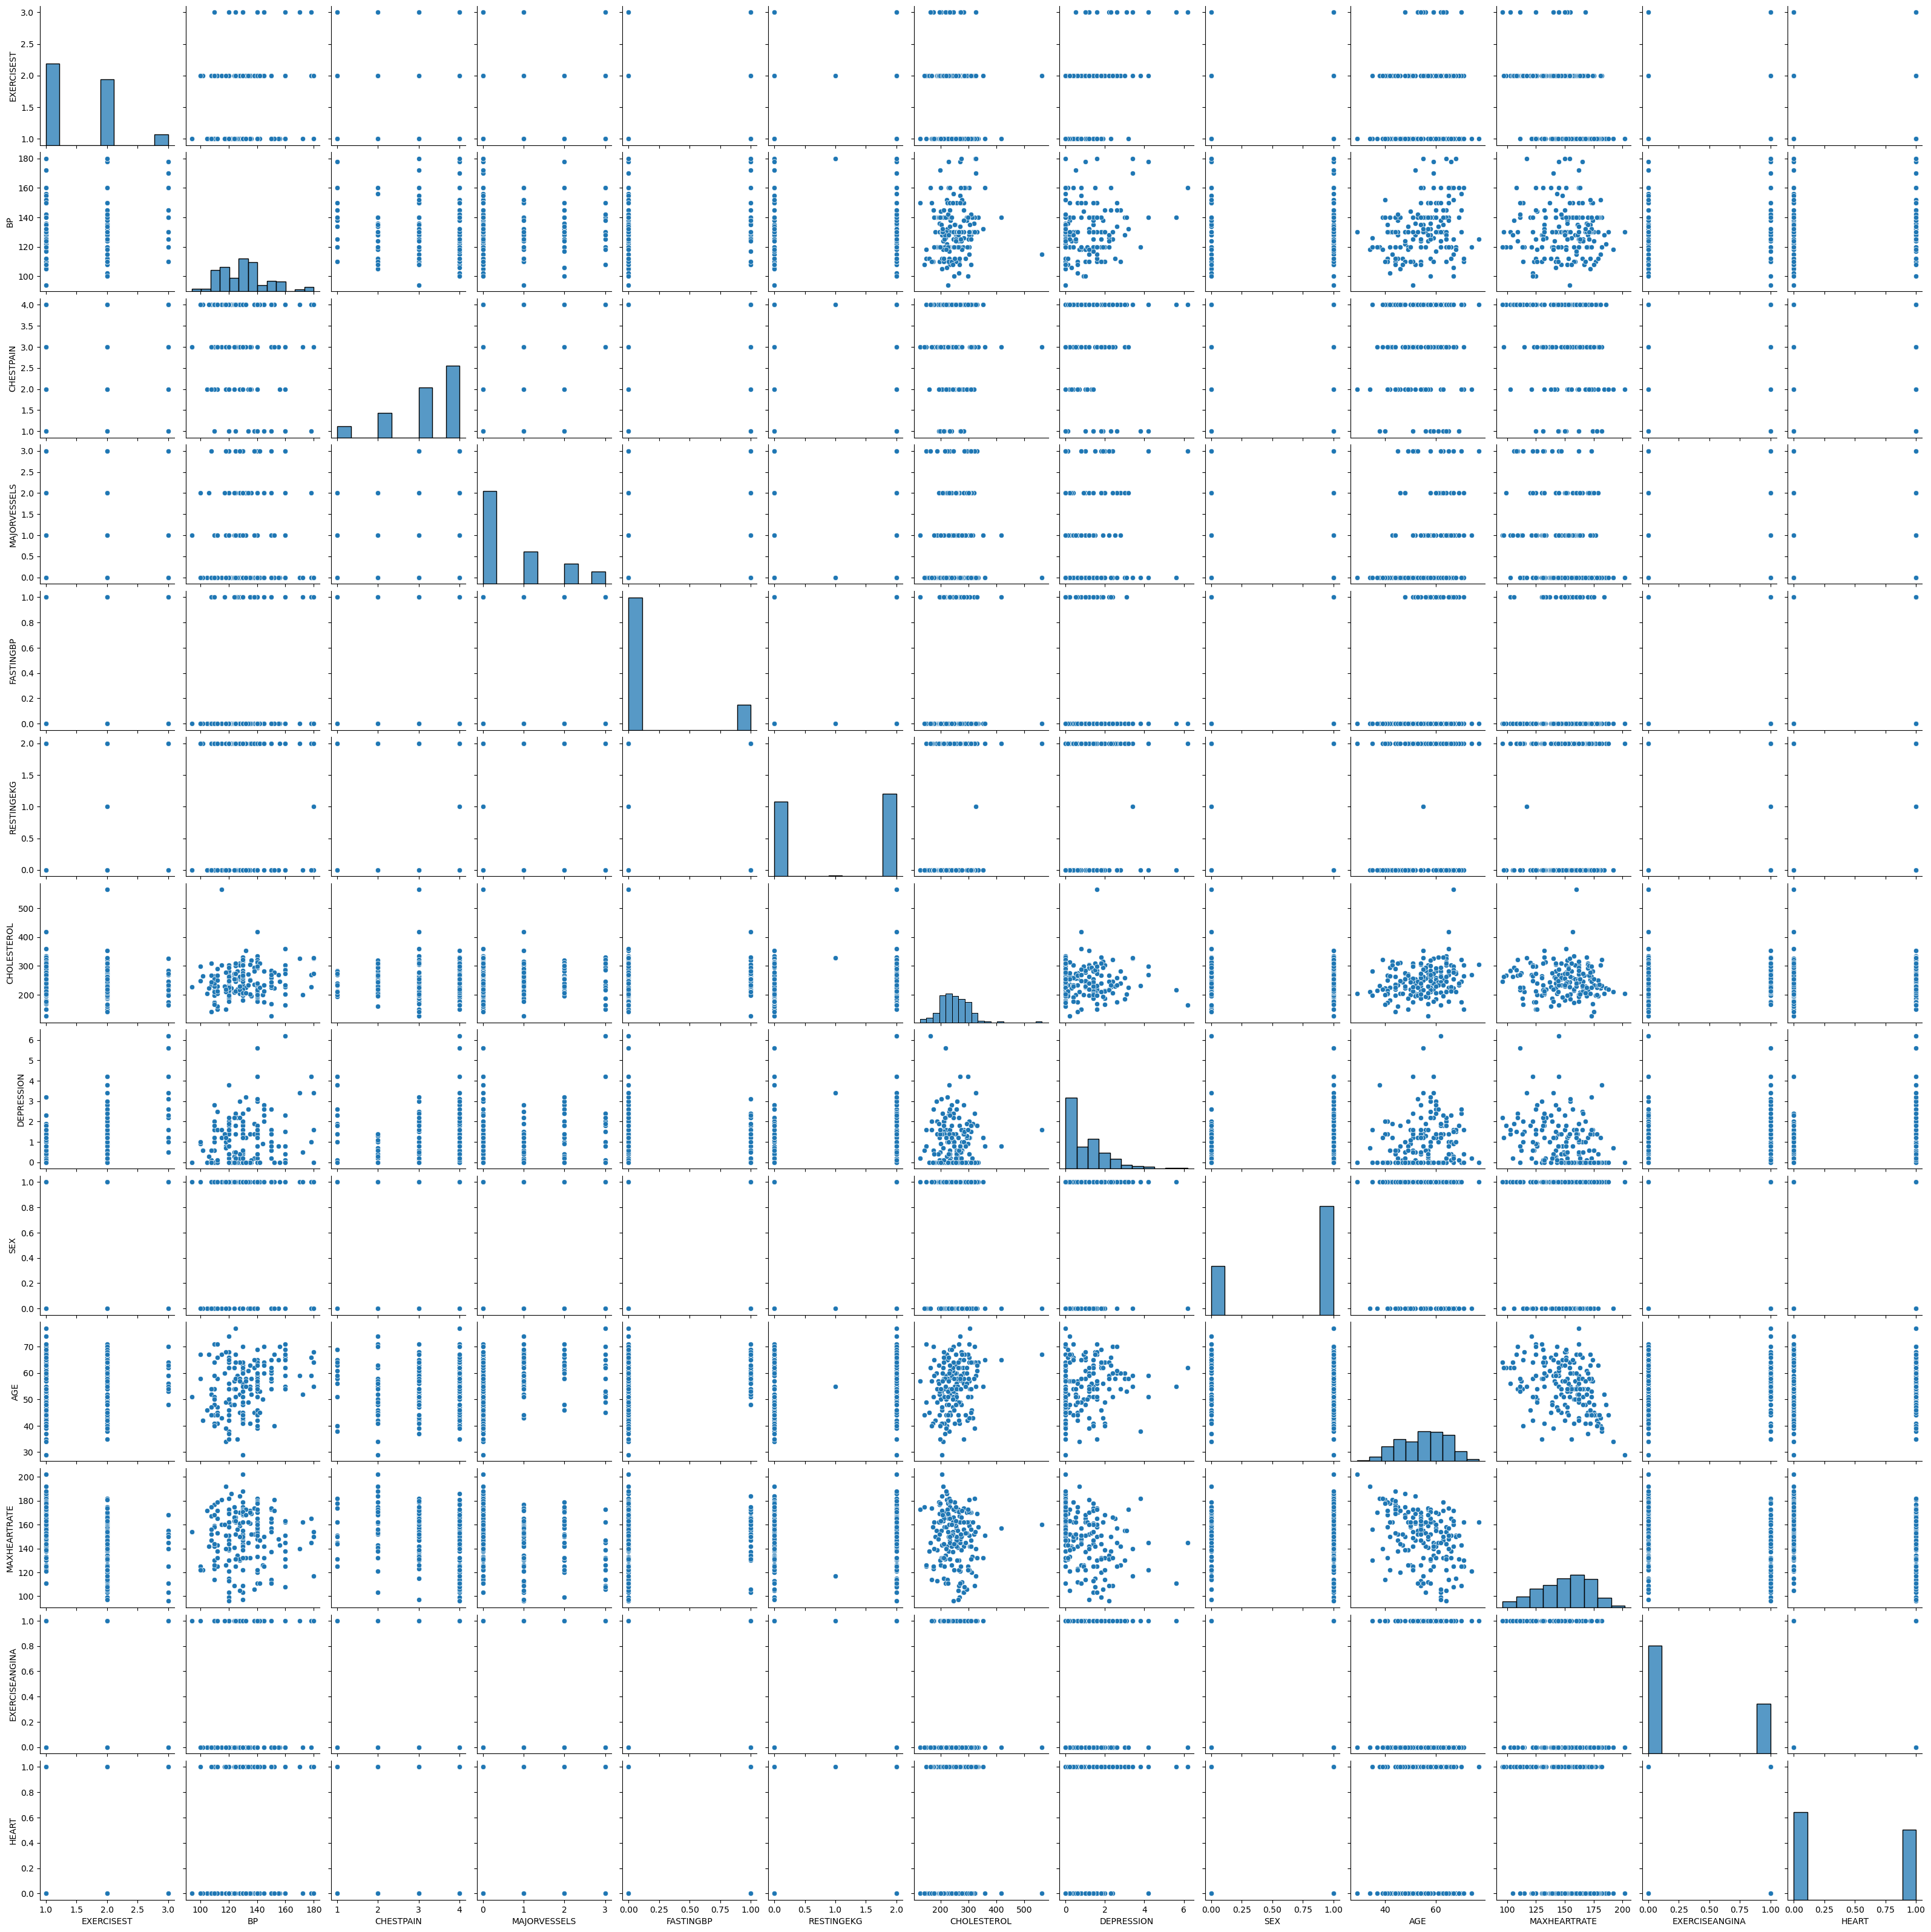

In [53]:
sns.pairplot(numaric_data)
plt.show()

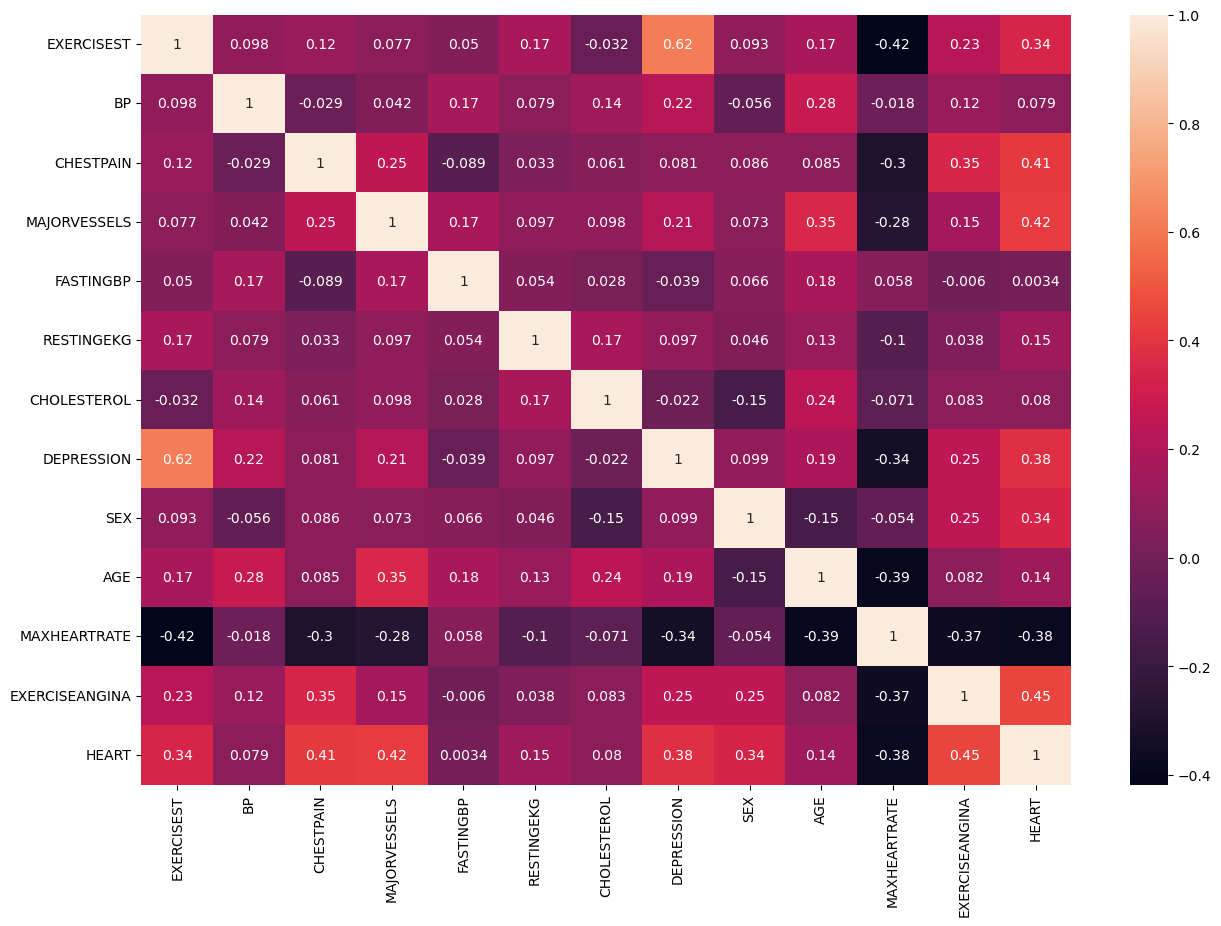

In [54]:
plt.figure(figsize=(15,10),facecolor='white')
sns.heatmap(data=numaric_data.corr(),annot=True)
plt.show()

# DATA PREPROCESSING

raw data before it is used in analysis.
- following are the several key tasks to prepare raw data for analysis:  
- 1). **Ckeck Missing Value**
- 2). **Convert categorical to numerical**
- 3). **Check outliers & Impute outliers**
- 4). **Feature transformation**
- 5). **Feature scaling**
- Effective data preprocessing enhances the quality of data, making it suitable for machine learning and statistical analysis,ultimately leading to more accurate and robust model outcomes.


In [57]:
data_new

,PATIENTID,EXERCISEST,THAL,BP,CHESTPAIN,MAJORVESSELS,FASTINGBP,RESTINGEKG,CHOLESTEROL,DEPRESSION,SEX,AGE,MAXHEARTRATE,EXERCISEANGINA,HEART
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [58]:
data_new.isnull().sum()

PATIENTID         0
EXERCISEST        0
THAL              0
BP                0
CHESTPAIN         0
MAJORVESSELS      0
FASTINGBP         0
RESTINGEKG        0
CHOLESTEROL       0
DEPRESSION        0
SEX               0
AGE               0
MAXHEARTRATE      0
EXERCISEANGINA    0
HEART             0
dtype: int64

### Catagorical encoding

In [60]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PATIENTID       180 non-null    object 
 1   EXERCISEST      180 non-null    int64  
 2   THAL            180 non-null    object 
 3   BP              180 non-null    int64  
 4   CHESTPAIN       180 non-null    int64  
 5   MAJORVESSELS    180 non-null    int64  
 6   FASTINGBP       180 non-null    int64  
 7   RESTINGEKG      180 non-null    int64  
 8   CHOLESTEROL     180 non-null    int64  
 9   DEPRESSION      180 non-null    float64
 10  SEX             180 non-null    int64  
 11  AGE             180 non-null    int64  
 12  MAXHEARTRATE    180 non-null    int64  
 13  EXERCISEANGINA  180 non-null    int64  
 14  HEART           180 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 21.2+ KB


In [61]:
cat_data

,PATIENTID,THAL
0,0z64un,normal
1,ryoo3j,normal
2,yt1s1x,normal
3,l2xjde,reversible_defect
4,oyt4ek,reversible_defect
...,...,...
175,5qfar3,reversible_defect
176,2s2b1f,normal
177,nsd00i,reversible_defect
178,0xw93k,normal


In [62]:
for col in data_new.columns:
    print(col,':',len(data_new[col].unique()),'labels') # We can prints information about the number of unique labels (unique values) in each column.

PATIENTID : 180 labels
EXERCISEST : 3 labels
THAL : 3 labels
BP : 36 labels
CHESTPAIN : 4 labels
MAJORVESSELS : 4 labels
FASTINGBP : 2 labels
RESTINGEKG : 3 labels
CHOLESTEROL : 118 labels
DEPRESSION : 34 labels
SEX : 2 labels
AGE : 40 labels
MAXHEARTRATE : 73 labels
EXERCISEANGINA : 2 labels
HEART : 2 labels


In [63]:
data_new=data_new.drop(columns=['PATIENTID'],axis=0)

In [64]:
data_new.head()

,EXERCISEST,THAL,BP,CHESTPAIN,MAJORVESSELS,FASTINGBP,RESTINGEKG,CHOLESTEROL,DEPRESSION,SEX,AGE,MAXHEARTRATE,EXERCISEANGINA,HEART
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


### Frequency Encoding

In [66]:
list(data_new.select_dtypes('object'))

['THAL']

In [67]:
## Converting the categorical data into Numerical data
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
# Encode the 'thal' column
data_new['THAL'] = label.fit_transform(data_new['THAL'])

# Check the encoded values
print(data_new['THAL'].head())


0    1
1    1
2    1
3    2
4    2
Name: THAL, dtype: int32


- We have only one Categorical value then we use LabelEncoder other wise use OneHot Encoder

In [69]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EXERCISEST      180 non-null    int64  
 1   THAL            180 non-null    int32  
 2   BP              180 non-null    int64  
 3   CHESTPAIN       180 non-null    int64  
 4   MAJORVESSELS    180 non-null    int64  
 5   FASTINGBP       180 non-null    int64  
 6   RESTINGEKG      180 non-null    int64  
 7   CHOLESTEROL     180 non-null    int64  
 8   DEPRESSION      180 non-null    float64
 9   SEX             180 non-null    int64  
 10  AGE             180 non-null    int64  
 11  MAXHEARTRATE    180 non-null    int64  
 12  EXERCISEANGINA  180 non-null    int64  
 13  HEART           180 non-null    int64  
dtypes: float64(1), int32(1), int64(12)
memory usage: 19.1 KB


## SCALING THE DATA


In [71]:
data_new.head()

,EXERCISEST,THAL,BP,CHESTPAIN,MAJORVESSELS,FASTINGBP,RESTINGEKG,CHOLESTEROL,DEPRESSION,SEX,AGE,MAXHEARTRATE,EXERCISEANGINA,HEART
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [72]:
# seperate independent & dependent variable

X = data_new.drop(['HEART'],axis=1) # this is input column
y = data_new.HEART # this is target valriable.

In [73]:
X

,EXERCISEST,THAL,BP,CHESTPAIN,MAJORVESSELS,FASTINGBP,RESTINGEKG,CHOLESTEROL,DEPRESSION,SEX,AGE,MAXHEARTRATE,EXERCISEANGINA
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0


In [74]:
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: HEART, Length: 180, dtype: int64

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(X)
final_data=pd.DataFrame(scaled_data,columns=X.columns)

In [76]:
# Display the scaled DataFrame
print('Original DataFrame:')
data_new.head()

Original DataFrame:


,EXERCISEST,THAL,BP,CHESTPAIN,MAJORVESSELS,FASTINGBP,RESTINGEKG,CHOLESTEROL,DEPRESSION,SEX,AGE,MAXHEARTRATE,EXERCISEANGINA,HEART
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [77]:
print("\nScaled Dataframe:")
final_data.head()


Scaled Dataframe:


,EXERCISEST,THAL,BP,CHESTPAIN,MAJORVESSELS,FASTINGBP,RESTINGEKG,CHOLESTEROL,DEPRESSION,SEX,AGE,MAXHEARTRATE,EXERCISEANGINA
0,0.0,0.5,0.395349,0.333333,0.0,0.0,1.0,0.415525,0.000000,1.0,0.333333,0.698113,0.0
1,0.5,0.5,0.186047,0.666667,0.0,0.0,0.0,0.200913,0.258065,0.0,0.520833,0.584906,0.0
2,0.0,0.5,0.360465,1.000000,1.0,0.0,1.0,0.406393,0.000000,1.0,1.000000,0.622642,1.0
3,0.0,1.0,0.674419,1.000000,0.0,0.0,0.0,0.221461,0.000000,1.0,0.229167,0.801887,0.0
4,1.0,1.0,0.976744,0.000000,0.0,0.0,1.0,0.328767,0.677419,1.0,0.625000,0.462264,0.0


In [78]:
data_new.duplicated().sum()

0

### Train Test Split

In [80]:
X.head()

,EXERCISEST,THAL,BP,CHESTPAIN,MAJORVESSELS,FASTINGBP,RESTINGEKG,CHOLESTEROL,DEPRESSION,SEX,AGE,MAXHEARTRATE,EXERCISEANGINA
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0


In [81]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: HEART, dtype: int64

In [82]:
# importing train test split for training & testing the data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)  # 20% for testing & 80% for training

In [83]:
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((144, 13), (144,), (36, 13), (36,))

# MODEL SELECTION

 - Model selection is a crucial step when working on machine learning projects that can significantly impact the accuracy and efficiency of the projects.
 - since it is Classification problem so we will select diffrent algorithm to check the accuracy and  how this data is performing

- Logistic Regression
- Random Forest Classifier
- Support Vector Machine (SVM)
- Gradient Boosting (e.g., XGBoost, LightGBM)
- Neural Networks

 Evaluation Metrics:
- Accuracy: Overall percentage of correct predictions.
- Precision: How many of the predicted "disease" cases were actually diseased.
- Recall: How many of the actual "disease" cases were correctly predicted.
- F1-Score: Harmonic mean of Precision and Recall.
- ROC-AUC: Area under the Receiver Operating Characteristic curve, which shows how well the model distinguishes between the two classes.

### LOGISTIC REGRESSION

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.89      0.80      0.84        20

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36

[[14  2]
 [ 4 16]]


In [90]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [91]:
y_train

117    1
65     1
67     0
31     1
12     1
      ..
71     0
106    0
14     1
92     0
102    1
Name: HEART, Length: 144, dtype: int64

### RANDOM FOREST CLASSIFICATION

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.70      0.82        20

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36

[[16  0]
 [ 6 14]]


In [94]:
from sklearn.model_selection import GridSearchCV

# Example hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search for the best hyperparameters
grid_search = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model for predictions
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)

# Evaluate the best model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.81


In [95]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate model performance
y_pred = best_rfc.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36

Confusion Matrix:
[[15  1]
 [ 6 14]]


In [96]:
feature_importances = best_rfc.feature_importances_

# Print feature importance
for feature, importance in zip(X_train.columns, feature_importances):
    print(f'{feature}: {importance:.4f}')


EXERCISEST: 0.0608
THAL: 0.1499
BP: 0.0364
CHESTPAIN: 0.1292
MAJORVESSELS: 0.1355
FASTINGBP: 0.0027
RESTINGEKG: 0.0257
CHOLESTEROL: 0.0553
DEPRESSION: 0.0869
SEX: 0.0316
AGE: 0.0719
MAXHEARTRATE: 0.0891
EXERCISEANGINA: 0.1248


In [97]:
from sklearn.model_selection import cross_val_score

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_rfc, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.79310345 0.79310345 0.82758621 0.86206897 0.85714286]
Mean CV Accuracy: 0.83


### SUPPORT VECTOR MACHINE

In [99]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Define the hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': [3, 4, 5]  # Degree of the polynomial kernel (only for 'poly')
}

# Step 2: Initialize the Support Vector Classifier
svm = SVC()

# Step 3: Set up GridSearchCV with 5-fold cross-validation
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)

# Step 4: Fit GridSearchCV on the training data
grid_search_svm.fit(X_train, y_train)

# Step 5: Get the best parameters and best score
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Score for SVM:", grid_search_svm.best_score_)

# Step 6: Use the best model for predictions
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Step 7: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy:.2f}")

# Step 8: Print classification report
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# Step 9: Print confusion matrix
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters for SVM: {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Best Score for SVM: 0.8472906403940886
SVM Accuracy: 0.86
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.94      0.80      0.86        20

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36

Confusion Matrix for SVM:
[[15  1]
 [ 4 16]]


In [100]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize the SVM model (using default parameters)
svm = SVC(kernel='rbf', C=1, gamma='scale')  # You can change kernel, C, and gamma

# Step 3: Train the SVM model
svm.fit(X_train_scaled, y_train)

# Step 4: Predict on the test set
y_pred_svm = svm.predict(X_test_scaled)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy:.2f}")

# Step 6: Print classification report
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# Step 7: Print confusion matrix
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.86
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36

Confusion Matrix for SVM:
[[16  0]
 [ 5 15]]


In [199]:
import numpy as np
input_data=(1,1,160,3,1,0,0,201,0.0,0,54,163,0)	
# change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('The person does not have geart Diseases')
else:
    print('The person has Heart Diseases')


[0]
The person does not have geart Diseases


In [187]:
model

LogisticRegression()